# Imports and Setting up Plotting

In [30]:
from datetime import date, timedelta
import os
import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

rcParams = {'figure.max_open_warning': 0,
            'figure.figsize': (15, 8),
            'axes.grid': True}

plt.rcParams.update(rcParams)
plt.style.use('bmh')

pd.options.display.max_rows = 50

# Loading Data

In [31]:
# Reading CSV files and Loading the data
filepath = os.path.join(os.getcwd(), "*.csv")
print("filepath: " + filepath)
csv_files = glob.glob(filepath)

data = {}

for csv_file in csv_files:
    print('Loading ', csv_file)
    data_key = csv_file.rsplit('\\', 1)[-1].split('.')[0]    
    df = pd.read_csv(csv_file)
    df.set_index('dates', inplace=True)
    df.index = pd.to_datetime(df.index)
    data[data_key] = df
    
asset_prices = data['asset_prices']

# Firstly Grab the data by country
countries = ['US', 'CA']
data_labels = ['Unemployment', 'IndustrialProduction', 'GDP', 'HomeSales']

economic_data = {}

for country in countries:
    tmp_data = {}

    for label in data_labels:
        tmp_data[f'{label}'] = data[f'{country}_{label}']

    economic_data[f'{country}'] = tmp_data

filepath: D:\710\job application\otpp qsr\second round\project2\*.csv
Loading  D:\710\job application\otpp qsr\second round\project2\asset_prices.csv
Loading  D:\710\job application\otpp qsr\second round\project2\CA_GDP.csv
Loading  D:\710\job application\otpp qsr\second round\project2\CA_HomeSales.csv
Loading  D:\710\job application\otpp qsr\second round\project2\CA_IndustrialProduction.csv
Loading  D:\710\job application\otpp qsr\second round\project2\CA_Unemployment.csv
Loading  D:\710\job application\otpp qsr\second round\project2\US_GDP.csv
Loading  D:\710\job application\otpp qsr\second round\project2\US_HomeSales.csv
Loading  D:\710\job application\otpp qsr\second round\project2\US_IndustrialProduction.csv
Loading  D:\710\job application\otpp qsr\second round\project2\US_Unemployment.csv


## Examining Data

In [32]:
asset_prices

,ES1 Index,PT1 Index,CADUSD Curncy,DXY Curncy
dates,,,,
1980-01-01,NaN,NaN,0.8559,85.820
1980-01-02,NaN,NaN,0.8578,85.320
1980-01-03,NaN,NaN,0.8545,85.260
1980-01-04,NaN,NaN,0.8557,85.230
1980-01-07,NaN,NaN,0.8551,84.790
...,...,...,...,...
2023-01-20,3988.50,1237.2,0.7474,102.012
2023-01-23,4036.50,1244.9,0.7481,102.138
2023-01-24,4032.75,1244.1,0.7480,101.918


In [33]:
economic_data

{'US': {'Unemployment':             actual_value  expected_value  number_of_forecaster
  dates                                                         
  1997-02-07           5.4             5.3                   0.0
  1997-03-07           5.3             5.3                   0.0
  1997-04-04           5.2             5.2                   0.0
  1997-05-02           4.9             5.2                   0.0
  1997-06-06           4.8             5.0                   0.0
  ...                  ...             ...                   ...
  2022-05-06           3.6             3.5                  76.0
  2022-06-03           3.6             3.5                  69.0
  2022-07-08           3.6             3.6                  74.0
  2022-08-05           3.5             3.6                  71.0
  2022-09-02           3.7             3.5                  71.0
  
  [307 rows x 3 columns],
  'IndustrialProduction':             actual_value  expected_value  number_of_forecaster
  dates        

In [34]:
# check missing values
for country in countries:
    for label in data_labels:
        print("missing value counts in df {}_{}: ".format(country,label))
        print(data[f'{country}_{label}'].isnull().sum())
        print()
print("missing value counts in df asset_prices: ")
print(asset_prices.isnull().sum())

missing value counts in df US_Unemployment: 
actual_value            0
expected_value          0
number_of_forecaster    0
dtype: int64

missing value counts in df US_IndustrialProduction: 
actual_value            0
expected_value          0
number_of_forecaster    0
dtype: int64

missing value counts in df US_GDP: 
actual_value            0
expected_value          0
number_of_forecaster    0
dtype: int64

missing value counts in df US_HomeSales: 
actual_value            0
expected_value          0
number_of_forecaster    0
dtype: int64

missing value counts in df CA_Unemployment: 
actual_value            0
expected_value          0
number_of_forecaster    0
dtype: int64

missing value counts in df CA_IndustrialProduction: 
actual_value            0
expected_value          0
number_of_forecaster    0
dtype: int64

missing value counts in df CA_GDP: 
actual_value            0
expected_value          0
number_of_forecaster    0
dtype: int64

missing value counts in df CA_HomeSales: 
actu

In [35]:
# No missing data in econ factors data
# Toronto Stock Exchange Index Futures (PT1) data missing before 9/8/1999
# S&P 500 Index Futures (PT1) data missing before 9/10/1997

In [36]:
# By inpecting the dataframe, we set the in-sample period and out-of-sample period
in_sample_start = '2005-06-01'
in_sample_end = '2015-05-31'
out_sample_start = '2015-06-01'
out_sample_end ='2022-07-28'

## Some thoughts on the performance of the trading signal

Please examine the results of your trading signal and provide some commentary on the performance. 

If it performs well. Why? If it doesn't, why not? How can you make it better? 

What would be the next steps, if on the job, you are asked to further explore this investigation?

# Building An Indicator - Yiling

## 1. finding a factor
### hypothesis:
### (1) positive GDP growth rate indicates good economy ahead
### (2) positive Industrial Production change indicates good economy ahead
### (3) positive growth in home sales indicates good economy ahead
### (4) a drop in unemployment rate indicates good economy ahead

### Since there is no data provided for US/CA inflation rate or interest rate, it is hard to predict the usd/cad fx rate. Therefore, the portfolio only consists of ES1 and PT1 index
### The combination of the above four indicators might have better prediction power

In [37]:
us_gdp = economic_data['US']['GDP'].copy()
ca_gdp = economic_data['CA']['GDP'].copy()
us_prod = economic_data['US']['IndustrialProduction'].copy()
ca_prod = economic_data['CA']['IndustrialProduction'].copy()
us_home = economic_data['US']['HomeSales'].copy()
ca_home = economic_data['CA']['HomeSales'].copy()
us_unemp = economic_data['US']['Unemployment'].copy()
ca_unemp = economic_data['CA']['Unemployment'].copy()

## 2. factor optimization
### we perform factor transformation and factor combination

In [38]:
# factor transformation - calculate the change of the unemployment rate

us_unemp['actual_value'] = -us_unemp['actual_value'].pct_change() * 100
ca_unemp['actual_value'] = -ca_unemp['actual_value'].pct_change() * 100
us_unemp['expected_value'] = -us_unemp['expected_value'].pct_change() * 100
ca_unemp['expected_value'] = -ca_unemp['expected_value'].pct_change() * 100
ca_home['expected_value'] = ca_home['expected_value'].pct_change() * 100
ca_home['actual_value'] = ca_home['actual_value'].pct_change() * 100
us_unemp = us_unemp[1:]
ca_unemp = ca_unemp[1:]
ca_home = ca_home[1:]

In [39]:
# factor transformation - calculate (actual - expected)
us_gdp['diff'] = us_gdp['actual_value'] - us_gdp['expected_value']
ca_gdp['diff'] = ca_gdp['actual_value'] - ca_gdp['expected_value']
us_prod['diff'] = us_prod['actual_value'] - us_prod['expected_value']
ca_prod['diff'] = ca_prod['actual_value'] - ca_prod['expected_value']
us_home['diff'] = us_home['actual_value'] - us_home['expected_value']
ca_home['diff'] = ca_home['actual_value'] - ca_home['expected_value']
us_unemp['diff'] = us_unemp['actual_value'] - us_unemp['expected_value']
ca_unemp['diff'] = ca_unemp['actual_value'] - ca_unemp['expected_value']

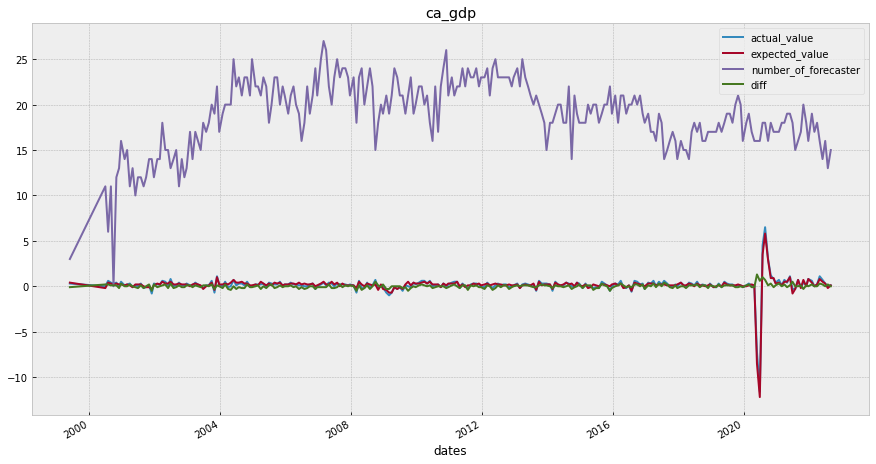

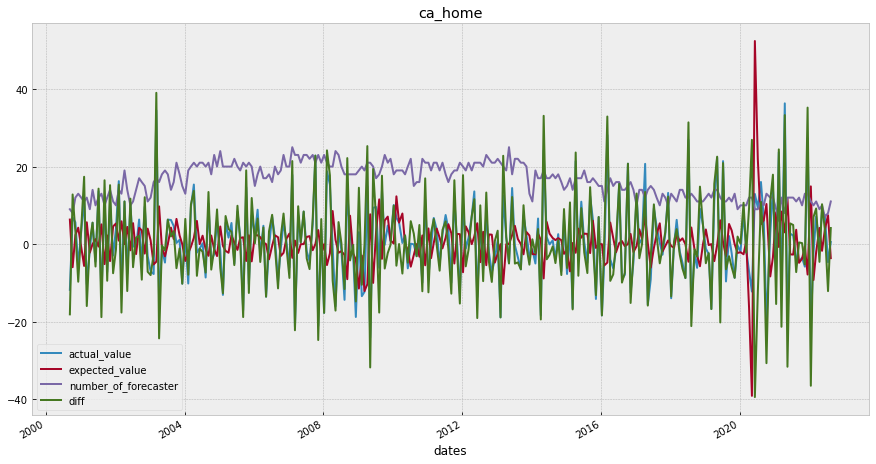

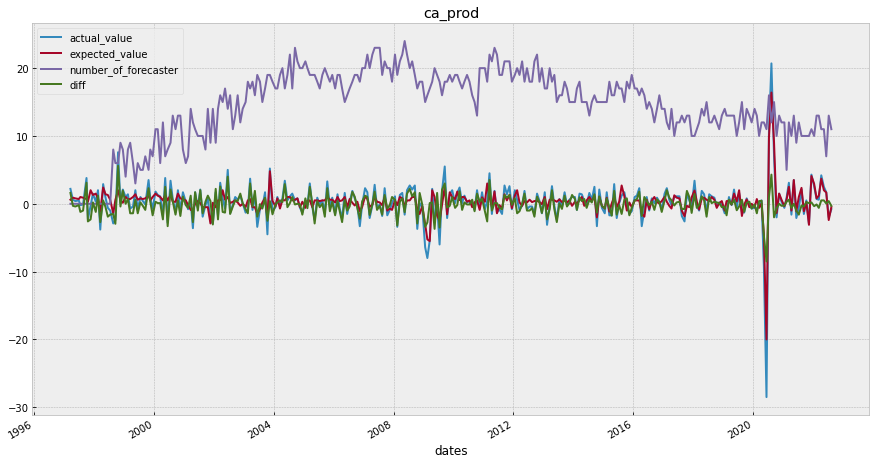

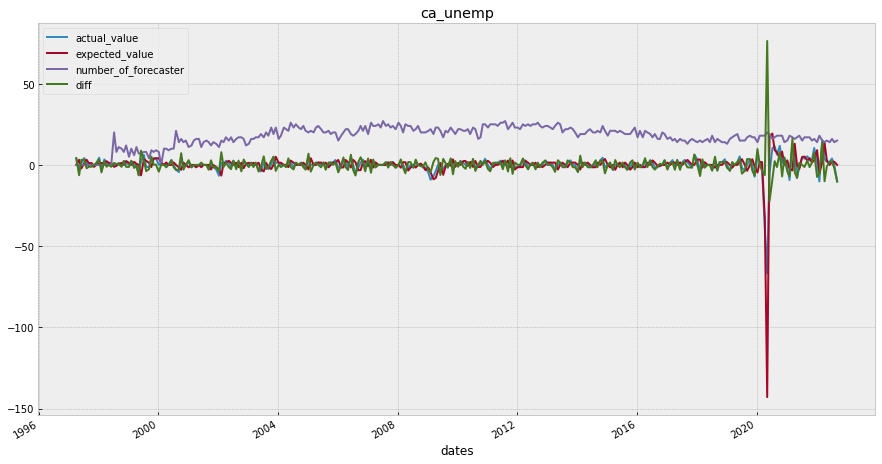

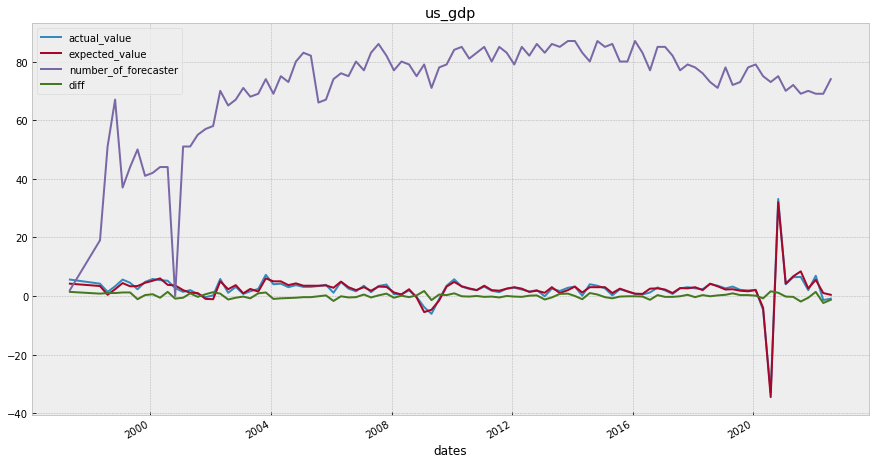

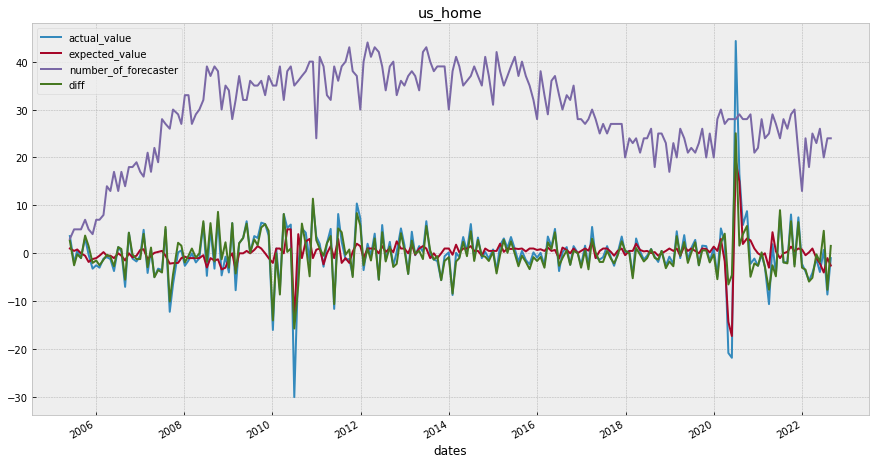

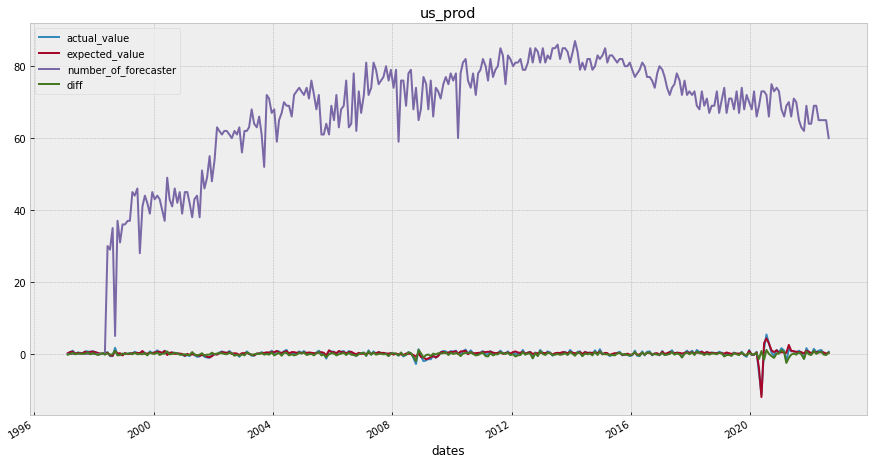

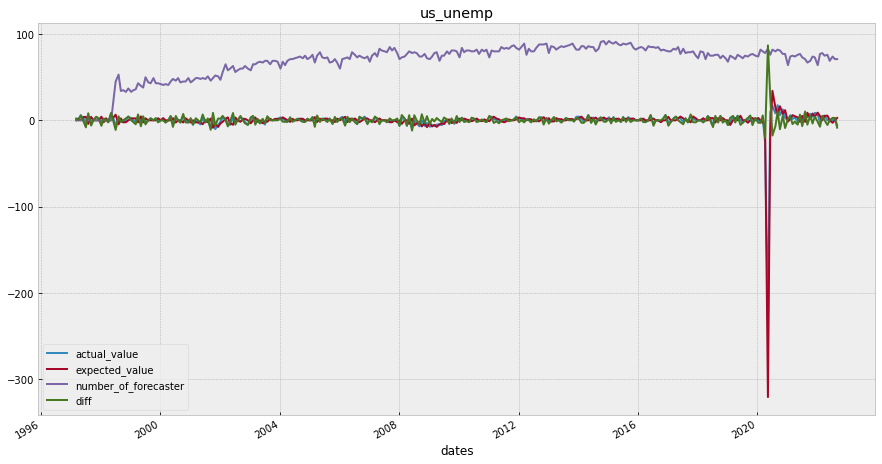

In [40]:
# inspect all econ factors
ca_gdp.plot(label='ca_gdp', title='ca_gdp')
ca_home.plot(label='ca_home', title='ca_home')
ca_prod.plot(label='ca_prod', title='ca_prod')
ca_unemp.plot(label='ca_unemp', title='ca_unemp')
us_gdp.plot(label='us_gdp', title='us_gdp')
us_home.plot(label='us_home', title='us_home')
us_prod.plot(label='us_prod', title='us_prod')
us_unemp.plot(label='us_unemp', title='us_unemp')
plt.legend()

### From the plots, we found that all econ factors show similar pattern and high vol in the year of 2020 (covid)

### we also noticed that we also need to calculate the percentage change for us home sales data. We went back and made the change

In [41]:
# Since each econ factors are published monthly/quarterly, we need to create a signal that is strong enough
# to make sure we can hold the stock for a longer period

def econ_signal(ts):
    # ts is a vector
    signal = pd.DataFrame(np.zeros((len(ts.index), 1)),index=ts.index, columns=['signal'])
    signal[(ts['actual_value'] > 0) & (ts['diff'] > 0)] = 1  # if value is positive and actual beats expectation
    signal[(ts['actual_value'] > 0) & (ts['diff'] <= 0)] = 0  # if value is positive but actual does not beat expectation
    signal[(ts['actual_value'] < 0) & (ts['diff'] < 0)] = -1
    signal[(ts['actual_value'] > 0) & (ts['diff'] <= 0)] = 0
    signal[ts['actual_value'] == 0] = 0
    signal[ts['number_of_forecaster'] < 10] = 0  # if # of forecaster too small, the estimates are not convincing
    
    return signal

In [42]:
us_gdp_sig = econ_signal(us_gdp)
ca_gdp_sig = econ_signal(ca_gdp)
us_prod_sig = econ_signal(us_prod)
ca_prod_sig = econ_signal(ca_prod)
us_home_sig = econ_signal(us_home)
ca_home_sig = econ_signal(ca_home)
us_unemp_sig = econ_signal(us_unemp)
ca_unemp_sig = econ_signal(ca_unemp)
# pd.set_option('display.max_rows', 10)
print(ca_gdp_sig)

            signal
dates             
1999-05-31     0.0
2000-06-30     0.0
2000-07-31     0.0
2000-08-31     1.0
2000-09-29     0.0
...            ...
2022-04-29     1.0
2022-05-31     1.0
2022-06-30     0.0
2022-07-29     0.0
2022-08-31     0.0

[268 rows x 1 columns]


In [43]:
# assets to invest: only us/ca equity index
ca_assets = ['PT1 Index']
us_assets = ['ES1 Index']

In [44]:
def calculate_pnl(ret, pos):
    # function to calculate profit and loss
    # we trade at the end of the period, and take profit & loss on the market move next period on our position
    # that's why we are shifting positon vector by one
    return ret.multiply(pos.shift(), axis=0).dropna()

In [45]:
# build the return series for each of the series
ca_returns = asset_prices[ca_assets].pct_change()
us_returns = asset_prices[us_assets].pct_change()

# Resample the Signal into daily signal
ca_daily_pos_gdp = ca_gdp_sig.resample('D').ffill()
us_daily_pos_gdp = us_gdp_sig.resample('D').ffill()
ca_daily_pos_prod = ca_prod_sig.resample('D').ffill()
us_daily_pos_prod = us_prod_sig.resample('D').ffill()
ca_daily_pos_home = ca_home_sig.resample('D').ffill()
us_daily_pos_home = us_home_sig.resample('D').ffill()
ca_daily_pos_unemp = ca_unemp_sig.resample('D').ffill()
us_daily_pos_unemp = us_unemp_sig.resample('D').ffill()

In [46]:
# calc pnl
us_pnl_gdp = calculate_pnl(us_returns, us_daily_pos_gdp['signal'])
ca_pnl_gdp = calculate_pnl(ca_returns, ca_daily_pos_gdp['signal'])
us_pnl_prod = calculate_pnl(us_returns, us_daily_pos_prod['signal'])
ca_pnl_prod = calculate_pnl(ca_returns, ca_daily_pos_prod['signal'])
us_pnl_home = calculate_pnl(us_returns, us_daily_pos_home['signal'])
ca_pnl_home = calculate_pnl(ca_returns, ca_daily_pos_home['signal'])
us_pnl_unemp = calculate_pnl(us_returns, us_daily_pos_unemp['signal'])
ca_pnl_unemp = calculate_pnl(ca_returns, ca_daily_pos_unemp['signal'])

In [47]:
# only need to get in_sample_pnl
us_pnl_gdp_in = us_pnl_gdp[(us_pnl_gdp.index >= in_sample_start) & (us_pnl_gdp.index <= in_sample_end)]
ca_pnl_gdp_in = ca_pnl_gdp[(ca_pnl_gdp.index >= in_sample_start) & (ca_pnl_gdp.index <= in_sample_end)]
us_pnl_prod_in = us_pnl_prod[(us_pnl_prod.index >= in_sample_start) & (us_pnl_prod.index <= in_sample_end)]
ca_pnl_prod_in = ca_pnl_prod[(ca_pnl_prod.index >= in_sample_start) & (ca_pnl_prod.index <= in_sample_end)]
us_pnl_home_in = us_pnl_home[(us_pnl_home.index >= in_sample_start) & (us_pnl_home.index <= in_sample_end)]
ca_pnl_home_in = ca_pnl_home[(ca_pnl_home.index >= in_sample_start) & (ca_pnl_home.index <= in_sample_end)]
us_pnl_unemp_in = us_pnl_unemp[(us_pnl_unemp.index >= in_sample_start) & (us_pnl_unemp.index <= in_sample_end)]
ca_pnl_unemp_in = ca_pnl_unemp[(ca_pnl_unemp.index >= in_sample_start) & (ca_pnl_unemp.index <= in_sample_end)]

In [48]:
us_pnl_gdp_in.cumsum()

,ES1 Index
dates,
2005-06-01,0.000000
2005-06-02,0.000000
2005-06-03,0.000000
2005-06-06,0.000000
2005-06-07,0.000000
...,...
2015-05-25,0.044105
2015-05-26,0.044105
2015-05-27,0.044105


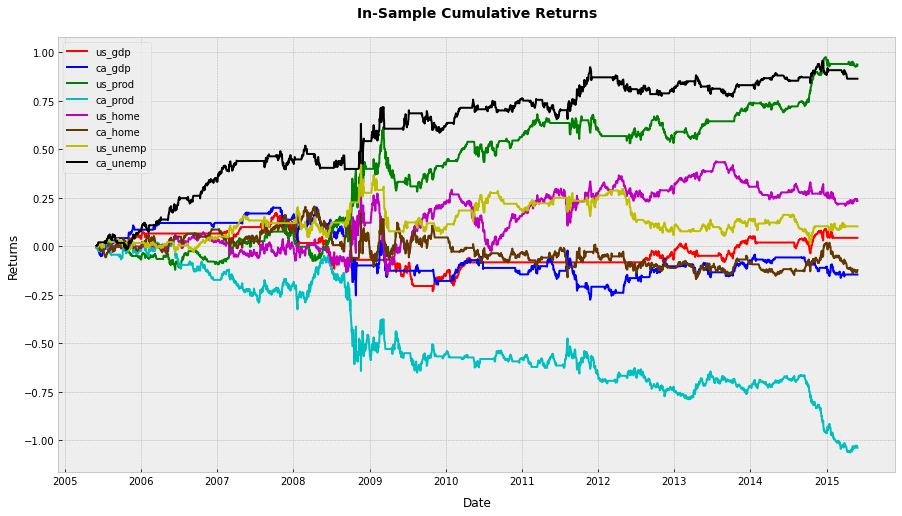

In [49]:
plt.figure()
plt.plot(us_pnl_gdp_in.index, us_pnl_gdp_in.cumsum(), color='r', label='us_gdp')
plt.plot(ca_pnl_gdp_in.index, ca_pnl_gdp_in.cumsum(), color='b', label='ca_gdp')
plt.plot(us_pnl_prod_in.index, us_pnl_prod_in.cumsum(), color='g', label='us_prod')
plt.plot(ca_pnl_prod_in.index, ca_pnl_prod_in.cumsum(), color='c', label='ca_prod')
plt.plot(us_pnl_home_in.index, us_pnl_home_in.cumsum(), color='m', label='us_home')
plt.plot(ca_pnl_home_in.index, ca_pnl_home_in.cumsum(), color='#653700', label='ca_home')
plt.plot(us_pnl_unemp_in.index, us_pnl_unemp_in.cumsum(), color='y', label='us_unemp')
plt.plot(ca_pnl_unemp_in.index, ca_pnl_unemp_in.cumsum(), color='k', label='ca_unemp')
plt.title('In-Sample Cumulative Returns', pad=20, fontsize=14,
          weight='bold')
plt.xlabel('Date', fontsize=12, labelpad=10)
plt.ylabel('Returns', fontsize=12)
plt.legend()

### we observe that if we invest based on the ca industrial production, the performance is very poor, surprisingly. we might try negative ca_prod. However, since us_prod seems a good factor. It is no reason to believe safely use negative ca_prod as a trust-worthy factor. Further analysis is needed to investigate why it has poor performance. Might be due to data issues for the ca_prod factor.


In [50]:
# next we rank the performance of each factor based on the simple cumulative return. Then we select factors that have
# low correlations with the best factor.

# From the plots, the best factor for ca index is ca_unemp, the best factor for us index is us_prod

df_all = pd.concat([us_gdp['actual_value'], ca_gdp['actual_value'], us_prod['actual_value'], ca_prod['actual_value'],
          us_home['actual_value'], ca_home['actual_value'], us_unemp['actual_value'], ca_unemp['actual_value']], sort=True,
                   keys=['us_gdp', 'ca_gdp', 'us_prod', 'ca_prod','us_home', 'ca_home', 'us_unemp', 'ca_unemp'], axis=1)
df_all.fillna(method="ffill", inplace=True)
df_all.fillna(method="bfill", inplace=True)
df_all.corr()[['ca_unemp', 'us_prod']]

,ca_unemp,us_prod
us_gdp,0.051050,0.029219
ca_gdp,0.145797,0.167852
us_prod,0.540613,1.000000
ca_prod,0.233405,0.324205
us_home,0.222777,0.308251
ca_home,0.060392,0.068802
us_unemp,0.758499,0.529692
ca_unemp,1.000000,0.540613


In [51]:
# We found that except ca_unemp, all other 3 ca factors all do not perform well. So we keep ca_unemp

# We found that us_prod has relative low correlation with us_home, which performs relatively well. We can combine the two
# factors

df_us = pd.concat([us_prod, us_home], sort=True, keys=['us_prod', 'us_home'], axis=1)
df_us.fillna(method="ffill", inplace=True)
df_us.fillna(method="bfill", inplace=True)
us_fac = df_us['us_prod'] + df_us['us_home']
print(us_fac)
print(ca_unemp)

            actual_value  expected_value  number_of_forecaster  diff
dates                                                               
1997-02-14           3.6            1.20                   3.0  2.40
1997-03-14           4.1            1.50                   3.0  2.60
1997-04-16           4.5            1.60                   3.0  2.90
1997-05-15           3.6            1.10                   3.0  2.50
1997-06-17           4.0            1.30                   3.0  2.70
...                  ...             ...                   ...   ...
2022-06-27           0.9           -3.60                  85.0  4.50
2022-07-15           0.5           -3.90                  85.0  4.40
2022-07-27          -8.8           -0.90                  89.0 -7.90
2022-08-16          -8.0           -0.70                  84.0 -7.30
2022-08-24          -0.4           -2.25                  84.0  1.85

[515 rows x 4 columns]
            actual_value  expected_value  number_of_forecaster       diff
dates

In [52]:
# signal
us_fac_sig = econ_signal(us_fac)
print(us_fac_sig)

# Resample the Signal into daily signal
us_daily_pos_fac = us_fac_sig.resample('D').ffill()

            signal
dates             
1997-02-14     0.0
1997-03-14     0.0
1997-04-16     0.0
1997-05-15     0.0
1997-06-17     0.0
...            ...
2022-06-27     1.0
2022-07-15     1.0
2022-07-27    -1.0
2022-08-16    -1.0
2022-08-24     0.0

[515 rows x 1 columns]


### we didn't do further optimization to ca factors. So we can use previous results from factor ca_unemp 

### To summarize now, for ca index, we selected factors “ca_unemp”, for us index, we selected factors “us_prod” and “us_home”, which have low correlations and good individual performance

# Performance evaluation

In [53]:
# calc pnl
us_pnl_fac = calculate_pnl(us_returns, us_daily_pos_fac['signal'])
ca_pnl_fac = calculate_pnl(ca_returns, ca_daily_pos_unemp['signal'])

us_pnl_prod = calculate_pnl(us_returns, us_daily_pos_prod['signal'])
us_pnl_home = calculate_pnl(us_returns, us_daily_pos_home['signal'])
ca_pnl_unemp = calculate_pnl(ca_returns, ca_daily_pos_unemp['signal'])

In [54]:
# test performance on out-of-sample period
us_pnl_fac = us_pnl_fac[(us_pnl_fac.index >= out_sample_start) & (us_pnl_fac.index <= out_sample_end)]
ca_pnl_fac = ca_pnl_fac[(ca_pnl_fac.index >= out_sample_start) & (ca_pnl_fac.index <= out_sample_end)]

us_pnl_prod_out = us_pnl_prod[(us_pnl_prod.index >= out_sample_start) & (us_pnl_prod.index <= out_sample_end)]
us_pnl_home_out = us_pnl_home[(us_pnl_home.index >= out_sample_start) & (us_pnl_home.index <= out_sample_end)]
ca_pnl_unemp_out = ca_pnl_unemp[(ca_pnl_unemp.index >= out_sample_start) & (ca_pnl_unemp.index <= out_sample_end)]

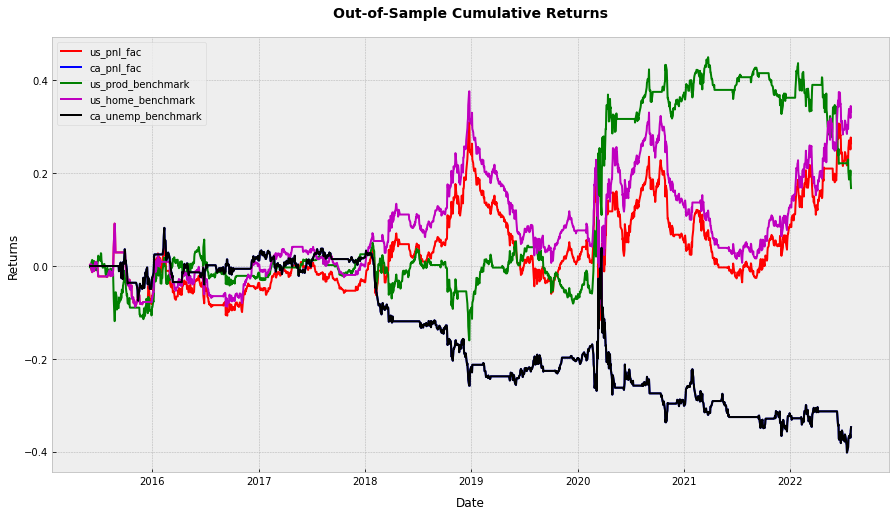

In [55]:
plt.figure()
plt.plot(us_pnl_fac.index, us_pnl_fac.cumsum(), color='r', label='us_pnl_fac')
plt.plot(ca_pnl_fac.index, ca_pnl_fac.cumsum(), color='b', label='ca_pnl_fac')
plt.plot(us_pnl_prod_out.index, us_pnl_prod_out.cumsum(), color='g', label='us_prod_benchmark')
plt.plot(us_pnl_home_out.index, us_pnl_home_out.cumsum(), color='m', label='us_home_benchmark')
plt.plot(ca_pnl_unemp_out.index, ca_pnl_unemp_out.cumsum(), color='k', label='ca_unemp_benchmark')
plt.title('Out-of-Sample Cumulative Returns', pad=20, fontsize=14,
          weight='bold')
plt.xlabel('Date', fontsize=12, labelpad=10)
plt.ylabel('Returns', fontsize=12)
plt.legend()

## observations:
### 1. althought ca unemployment rate change has been a good factor from 2005-2015，when market conditions change and volatility increases during special circumstances, we might not simply rely on it. Therefore adjusting strategy frequently is very important. And it is important to diversify over different factors and asset classes
### 2. The diversification comes into play for us factors. US home sales change is performing badly during 2021; however, the us industrial production change offsets the negative effect a lot. Therefore, the combined us factor performance is better than using us home sales change as the indicator

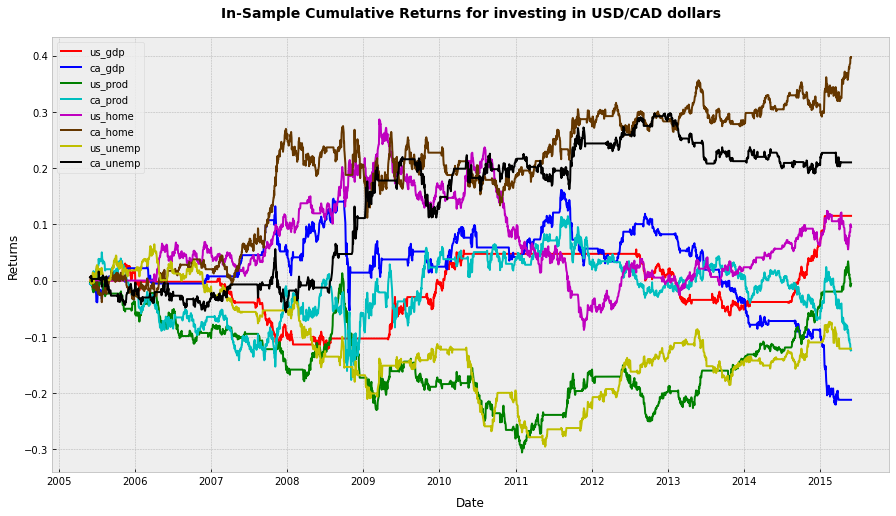

In [56]:
# exploratory analysis on investing in dollar assets

# build return series
ca_returns = asset_prices['CADUSD Curncy'].pct_change()
us_returns = asset_prices['DXY Curncy'].pct_change()

# calc pnl for in-sample period for investing in usd/cad
us_pnl_gdp = calculate_pnl(us_returns, us_daily_pos_gdp['signal'])
ca_pnl_gdp = calculate_pnl(ca_returns, ca_daily_pos_gdp['signal'])
us_pnl_prod = calculate_pnl(us_returns, us_daily_pos_prod['signal'])
ca_pnl_prod = calculate_pnl(ca_returns, ca_daily_pos_prod['signal'])
us_pnl_home = calculate_pnl(us_returns, us_daily_pos_home['signal'])
ca_pnl_home = calculate_pnl(ca_returns, ca_daily_pos_home['signal'])
us_pnl_unemp = calculate_pnl(us_returns, us_daily_pos_unemp['signal'])
ca_pnl_unemp = calculate_pnl(ca_returns, ca_daily_pos_unemp['signal'])

us_pnl_gdp_in = us_pnl_gdp[(us_pnl_gdp.index >= in_sample_start) & (us_pnl_gdp.index <= in_sample_end)]
ca_pnl_gdp_in = ca_pnl_gdp[(ca_pnl_gdp.index >= in_sample_start) & (ca_pnl_gdp.index <= in_sample_end)]
us_pnl_prod_in = us_pnl_prod[(us_pnl_prod.index >= in_sample_start) & (us_pnl_prod.index <= in_sample_end)]
ca_pnl_prod_in = ca_pnl_prod[(ca_pnl_prod.index >= in_sample_start) & (ca_pnl_prod.index <= in_sample_end)]
us_pnl_home_in = us_pnl_home[(us_pnl_home.index >= in_sample_start) & (us_pnl_home.index <= in_sample_end)]
ca_pnl_home_in = ca_pnl_home[(ca_pnl_home.index >= in_sample_start) & (ca_pnl_home.index <= in_sample_end)]
us_pnl_unemp_in = us_pnl_unemp[(us_pnl_unemp.index >= in_sample_start) & (us_pnl_unemp.index <= in_sample_end)]
ca_pnl_unemp_in = ca_pnl_unemp[(ca_pnl_unemp.index >= in_sample_start) & (ca_pnl_unemp.index <= in_sample_end)]

# plot
plt.figure()
plt.plot(us_pnl_gdp_in.index, us_pnl_gdp_in.cumsum(), color='r', label='us_gdp')
plt.plot(ca_pnl_gdp_in.index, ca_pnl_gdp_in.cumsum(), color='b', label='ca_gdp')
plt.plot(us_pnl_prod_in.index, us_pnl_prod_in.cumsum(), color='g', label='us_prod')
plt.plot(ca_pnl_prod_in.index, ca_pnl_prod_in.cumsum(), color='c', label='ca_prod')
plt.plot(us_pnl_home_in.index, us_pnl_home_in.cumsum(), color='m', label='us_home')
plt.plot(ca_pnl_home_in.index, ca_pnl_home_in.cumsum(), color='#653700', label='ca_home')
plt.plot(us_pnl_unemp_in.index, us_pnl_unemp_in.cumsum(), color='y', label='us_unemp')
plt.plot(ca_pnl_unemp_in.index, ca_pnl_unemp_in.cumsum(), color='k', label='ca_unemp')
plt.title('In-Sample Cumulative Returns for investing in USD/CAD dollars', pad=20, fontsize=14,
          weight='bold')
plt.xlabel('Date', fontsize=12, labelpad=10)
plt.ylabel('Returns', fontsize=12)
plt.legend()

### As expected, available econ data are not directly associated with currency value change. Therefore, the performance here are worse than investing in stock index

# Further thoughts

In [57]:
# 1. instead of purely replying on external forecaster's estimate, it is also beneficial to create our own estimates of
# different econ factors and use forecaster's estimate as benchmark

# 2. We might increase backtesting period and preform more frequent backtesting to adjust the factors to use over time

# 3. risk & performance monitoring needs to be constantly monitored. The evaluation metrics can be visualized using an
# automated dashboard to present to clients

# 4. Asset classes and securities pool can be further expanded; active securities selection; min. transaction cost

# 5. Prediction of econ conditions can be combined with other strategies to further improve portfolio performance.